In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [18]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Solving the MINST Data ANN Approach

In [20]:
train_data = datasets.MNIST(root="../Data",train=True, download=True, transform=transforms.ToTensor())

In [21]:
test_data = datasets.MNIST(root="../Data",train=False, download=True, transform=transforms.ToTensor())

In [22]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [23]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [24]:
train_loader = DataLoader(dataset=train_data,batch_size=600, shuffle=True)
test_loader = DataLoader(dataset=test_data,batch_size=100)

In [25]:
for X_train, y_train in train_loader:
    break

In [26]:
class MultilayerNetowrk(nn.Module):
    def __init__(self, no_inputs, no_outputs, hidden_layers):
        super().__init__()
        layers = []
        for h in hidden_layers:
            layers.append(nn.Linear(no_inputs, h))
            layers.append(nn.ReLU(inplace=True))
            no_inputs = h
        layers.append(nn.Linear(no_inputs, no_outputs))
        layers.append(nn.LogSoftmax(dim=1))
        self.layers = nn.Sequential(*layers)
        
    def forward(self, X):
        return self.layers(X)

In [27]:
model = MultilayerNetowrk(28 * 28, 10, [100, 50])

In [28]:
model

MultilayerNetowrk(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=50, out_features=10, bias=True)
    (5): LogSoftmax()
  )
)

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

In [30]:
epochs = 10
train_losses = []
test_losses = []
train_corrs = []
for epoch in range(epochs):
    epoch += 1
    train_loss = 0
    test_loss = 0
    length = 100
    train_corr = 0
    test_corr = 0
    
    for X_train, y_train in test_loader:
        y_pred = model(X_train.view(X_train.shape[0], -1))
        loss = criterion(y_pred, y_train)
        train_loss += loss.item()
        train_corr += (y_pred.argmax(1) == y_train).sum()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    batch_loss_avg = train_loss / 100
    train_losses.append(batch_loss_avg)
    train_corrs.append(train_corr.float()/100)
    
    print(f'Epooch [{epoch}/{epochs}]. Loss : {batch_loss_avg:.3f}. Accuracy : {train_corr.float()/100}')

Epooch [1/10]. Loss : 0.781. Accuracy : 77.80000305175781
Epooch [2/10]. Loss : 0.325. Accuracy : 90.31999969482422
Epooch [3/10]. Loss : 0.251. Accuracy : 92.6500015258789
Epooch [4/10]. Loss : 0.202. Accuracy : 93.8499984741211
Epooch [5/10]. Loss : 0.161. Accuracy : 95.13999938964844
Epooch [6/10]. Loss : 0.126. Accuracy : 96.22000122070312
Epooch [7/10]. Loss : 0.099. Accuracy : 97.04000091552734
Epooch [8/10]. Loss : 0.077. Accuracy : 97.8499984741211
Epooch [9/10]. Loss : 0.060. Accuracy : 98.43000030517578
Epooch [10/10]. Loss : 0.047. Accuracy : 98.7699966430664


In [31]:
test_loss = 0
test_corr = 0
for X_test, y_test in test_loader:
    y_pred = model(X_test.view(X_train.shape[0], -1))
    loss = criterion(y_pred, y_test)
    test_loss += loss.item()
    test_corr += (y_pred.argmax(1) == y_test).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
batch_loss_avg = test_loss / 100

print(f'Loss : {batch_loss_avg:.3f}. Accuracy : {test_corr.float()/100}')

Loss : 0.039. Accuracy : 99.02999877929688


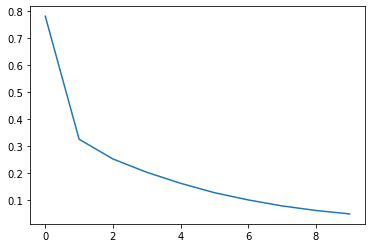

In [32]:
plt.plot(range(epochs), train_losses)

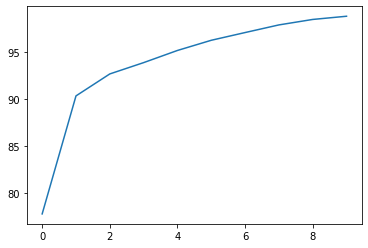

In [33]:
plt.plot(range(epochs), train_corrs)

In [ ]:
class ConvolutionalNetowrk(nn.Module):
    def __init__(self):
        nn.Conv2d()
        nn.MaxPool2d()
        pass
    
    def forward(self,X):
        pass